# Auto-encoder vs PCA avec des données sur les élections

In [1]:
import numpy as np
from turtle import * 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas

In [3]:
elections=pandas.read_excel("dataElections.xlsx", encoding='utf8')

In [4]:
elections.head(2)

,Code.du.département,Libellé.du.département,Code.de.la.circonscription,Libellé.de.la.circonscription,Code.de.la.commune,Libellé.de.la.commune,Code.du.b.vote,Inscrits,Abstentions,X..Abs.Ins,...,Voix10,X..Voix.Ins10,X..Voix.Exp10,N.Panneau11,Sexe11,Nom11,Prénom11,Voix11,X..Voix.Ins11,X..Voix.Exp11
0,1,Ain,4,4ème circonscription,1,L'Abergement-Clémenciat,1,598,92,15.38,...,6,1.00,1.21,11,M,FILLON,François,110,18.39,22.22
1,1,Ain,5,5ème circonscription,2,L'Abergement-de-Varey,1,209,25,11.96,...,1,0.48,0.57,11,M,FILLON,François,34,16.27,19.32


In [5]:
print(elections.shape)

(69242, 98)


### 1) Principal Component Analysis (PCA)

In [6]:
from sklearn.decomposition import PCA

##### 1.1 Feature sélection

In [7]:
candidats=elections[["X..Voix.Ins1", "X..Voix.Ins2", "X..Voix.Ins3", "X..Voix.Ins4", "X..Voix.Ins5", "X..Voix.Ins6", "X..Voix.Ins7", "X..Voix.Ins8", "X..Voix.Ins9", "X..Voix.Ins10", "X..Voix.Ins11"]]
candidats.columns=["Nicolas DUPONT-AIGNAN", "Marine LE PEN", "Emmanuel MACRON", "Benoît HAMON", "Nathalie ARTHAUD", "Philippe POUTOU", "Jacques CHEMINADE", "Jean LASALLE", "Jean-Luc MELENCHON", "François ASSELINEAU", "François FILLON"]

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(np.array(candidats))
candidats=pandas.DataFrame(scaler.transform(np.array(candidats)))
candidats.columns=["Nicolas DUPONT-AIGNAN", "Marine LE PEN", "Emmanuel MACRON", "Benoît HAMON", "Nathalie ARTHAUD", "Philippe POUTOU", "Jacques CHEMINADE", "Jean LASALLE", "Jean-Luc MELENCHON", "François ASSELINEAU", "François FILLON"]

In [9]:
candidats.head(2)

,Nicolas DUPONT-AIGNAN,Marine LE PEN,Emmanuel MACRON,Benoît HAMON,Nathalie ARTHAUD,Philippe POUTOU,Jacques CHEMINADE,Jean LASALLE,Jean-Luc MELENCHON,François ASSELINEAU,François FILLON
0,0.14225,0.286784,0.301607,0.079678,0.066075,0.033021,0.049475,0.005487,0.148043,0.059988,0.218383
1,0.07175,0.312645,0.268263,0.102185,0.094675,0.047314,0.000000,0.000000,0.236838,0.028794,0.193207


##### 1.2 PCA with 2 axis

In [10]:
pca = PCA(n_components=2)
pca.fit(candidats)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# Estimation, calcul des composantes principales
C = pca.fit(candidats).transform(candidats)

##### 1.3 Display PCA output

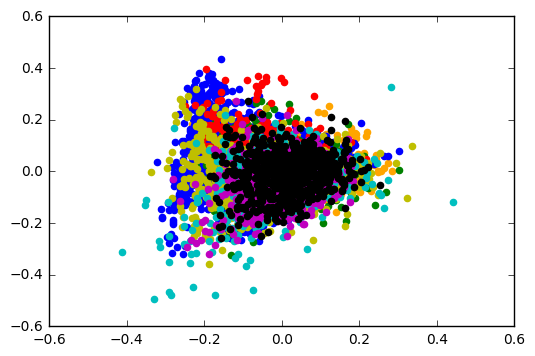

In [12]:
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Ain').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Ain').reshape(elections.shape[0]),1], label='Ain', color="orange")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Rhône').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Rhône').reshape(elections.shape[0]),1], label='Rhône', color="b")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Savoie').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Savoie').reshape(elections.shape[0]),1], label='Savoie', color="g")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Haute-Savoie').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Haute-Savoie').reshape(elections.shape[0]),1], label='Haute-Savoie', color="r")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Isère').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Isère').reshape(elections.shape[0]),1], label='Isère', color="y")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Drôme').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Drôme').reshape(elections.shape[0]),1], label='Drôme', color="c")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Ardèche').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Ardèche').reshape(elections.shape[0]),1], label='Ardèche', color="m")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Loire').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Loire').reshape(elections.shape[0]),1], label='Loire', color="k")

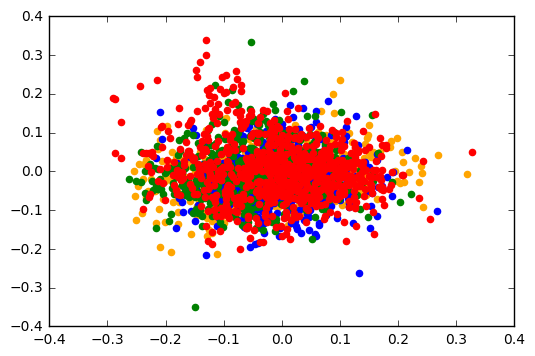

In [33]:
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Vienne').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Vienne').reshape(elections.shape[0]),1], label='Vienne', color="orange")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Charente').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Charente').reshape(elections.shape[0]),1], label='Charente', color="b")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Deux-Sèvres').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Deux-Sèvres').reshape(elections.shape[0]),1], label='Deux-Sèvres', color="g")
plt.scatter(C[np.array(elections[["Libellé.du.département"]]=='Charente-Maritime').reshape(elections.shape[0]),0], C[np.array(elections[["Libellé.du.département"]]=='Charente-Maritime').reshape(elections.shape[0]),1], label='Charente-Maritime', color="r")

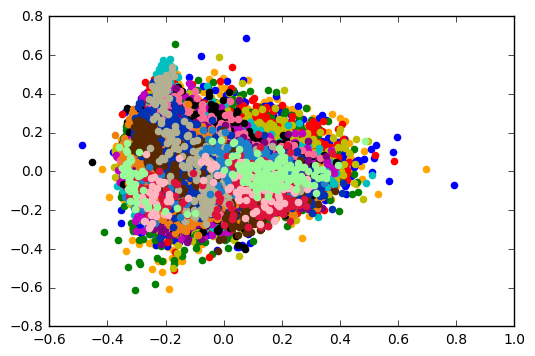

In [39]:
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==1).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==1).reshape(elections.shape[0]),1], label='1ère circonscription', color="orange")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==2).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==2).reshape(elections.shape[0]),1], label='2ème circonscription', color="b")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==3).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==3).reshape(elections.shape[0]),1], label='3ème circonscription', color="g")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==4).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==4).reshape(elections.shape[0]),1], label='4ème circonscription', color="r")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==5).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==5).reshape(elections.shape[0]),1], label='5ème circonscription', color="y")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==6).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==6).reshape(elections.shape[0]),1], label='6ème circonscription', color="c")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==7).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==7).reshape(elections.shape[0]),1], label='7ème circonscription', color="m")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==8).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==8).reshape(elections.shape[0]),1], label='8ème circonscription', color="k")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==9).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==9).reshape(elections.shape[0]),1], label='9ème circonscription', color="#FD6C95")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==10).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==10).reshape(elections.shape[0]),1], label='10ème circonscription', color="#800080")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==11).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==11).reshape(elections.shape[0]),1], label='11ème circonscription', color="#ED7F10")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==12).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==12).reshape(elections.shape[0]),1], label='12ème circonscription', color="#0131B4")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==13).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==13).reshape(elections.shape[0]),1], label='13ème circonscription', color="#582900")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==14).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==14).reshape(elections.shape[0]),1], label='14ème circonscription', color="#B3B191")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==15).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==15).reshape(elections.shape[0]),1], label='15ème circonscription', color="#1E7FCB")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==16).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==16).reshape(elections.shape[0]),1], label='16ème circonscription', color="crimson")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==17).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==17).reshape(elections.shape[0]),1], label='17ème circonscription', color="lightpink")
plt.scatter(C[np.array(elections[["Code.de.la.circonscription"]]==18).reshape(elections.shape[0]),0], C[np.array(elections[["Code.de.la.circonscription"]]==18).reshape(elections.shape[0]),1], label='18ème circonscription', color="palegreen")

### 2) Non linear deep auto-encoder with keras

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


##### 2.1 Build an non linear deep auto-encoder architecture (like the Hinton's article about dimensionality reduction)

In [27]:
# Size of our encoded representations (compression of input image from 784 floats to 2 floats)
encoding_dim = 2

# Input placeholder :
input_img = Input(shape=(11,))

# Encoded representation of the input (="encoded") :
encoded = Dense(5, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Lossy reconstruction of the input (="decoded") :
decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(11, activation='sigmoid')(decoded)

# Model maps an input to its encoded representation :
encoder = Model(input_img, encoded)
# Model maps an input to its reconstruction :
autoencoder = Model(input_img, decoded)

# create a placeholder for an encoded (2-dimensional) input
encoded_input_1 = Input(shape=(encoding_dim,))
encoded_input_2 = Input(shape=(5,))
encoded_input_3 = Input(shape=(11,))

# retrieve the last layer of the autoencoder model
decoder_layer_2 = autoencoder.layers[-2]
decoder_layer_1 = autoencoder.layers[-1]

# Decoder model
decoder_1 = Model(input=encoded_input_1, output=decoder_layer_1(decoder_layer_2(encoded_input_1)))

# Pass optimizer (adadelta) with a 'mean squared error" loss
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 3.2 Trained an auto-encoder and predict

In [ ]:
x_train=np.array(candidats)
autoencoder.fit(x_train, x_train, nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_train,x_train))

Train on 69242 samples, validate on 69242 samples
Epoch 1/50
69242/69242 [==============================] - 1s - loss: 0.0016 - val_loss: 0.0016 3840/69242 [>.............................] - ETA: 1s - loss: 0.0016

In [49]:
encoded_imgs=encoder.predict(np.array(candidats))
decoded_imgs=decoder_1.predict(encoded_imgs)

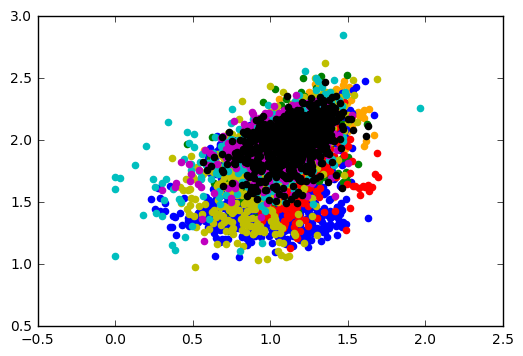

In [50]:
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Ain').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Ain').reshape(elections.shape[0]),1], label='Ain', color="orange")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Rhône').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Rhône').reshape(elections.shape[0]),1], label='Rhône', color="b")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Savoie').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Savoie').reshape(elections.shape[0]),1], label='Savoie', color="g")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Haute-Savoie').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Haute-Savoie').reshape(elections.shape[0]),1], label='Haute-Savoie', color="r")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Isère').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Isère').reshape(elections.shape[0]),1], label='Isère', color="y")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Drôme').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Drôme').reshape(elections.shape[0]),1], label='Drôme', color="c")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Ardèche').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Ardèche').reshape(elections.shape[0]),1], label='Ardèche', color="m")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Loire').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Loire').reshape(elections.shape[0]),1], label='Loire', color="k")

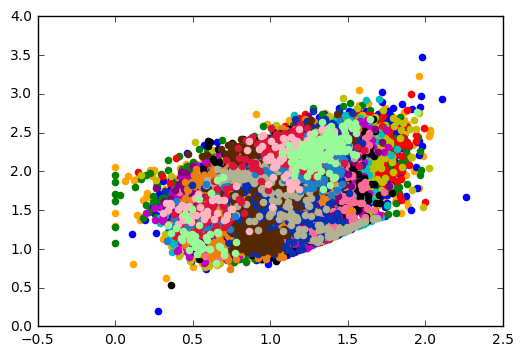

In [51]:
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==1).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==1).reshape(elections.shape[0]),1], label='1ère circonscription', color="orange")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==2).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==2).reshape(elections.shape[0]),1], label='2ème circonscription', color="b")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==3).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==3).reshape(elections.shape[0]),1], label='3ème circonscription', color="g")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==4).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==4).reshape(elections.shape[0]),1], label='4ème circonscription', color="r")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==5).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==5).reshape(elections.shape[0]),1], label='5ème circonscription', color="y")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==6).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==6).reshape(elections.shape[0]),1], label='6ème circonscription', color="c")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==7).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==7).reshape(elections.shape[0]),1], label='7ème circonscription', color="m")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==8).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==8).reshape(elections.shape[0]),1], label='8ème circonscription', color="k")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==9).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==9).reshape(elections.shape[0]),1], label='9ème circonscription', color="#FD6C95")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==10).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==10).reshape(elections.shape[0]),1], label='10ème circonscription', color="#800080")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==11).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==11).reshape(elections.shape[0]),1], label='11ème circonscription', color="#ED7F10")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==12).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==12).reshape(elections.shape[0]),1], label='12ème circonscription', color="#0131B4")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==13).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==13).reshape(elections.shape[0]),1], label='13ème circonscription', color="#582900")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==14).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==14).reshape(elections.shape[0]),1], label='14ème circonscription', color="#B3B191")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==15).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==15).reshape(elections.shape[0]),1], label='15ème circonscription', color="#1E7FCB")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==16).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==16).reshape(elections.shape[0]),1], label='16ème circonscription', color="crimson")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==17).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==17).reshape(elections.shape[0]),1], label='17ème circonscription', color="lightpink")
plt.scatter(encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==18).reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Code.de.la.circonscription"]]==18).reshape(elections.shape[0]),1], label='18ème circonscription', color="palegreen")

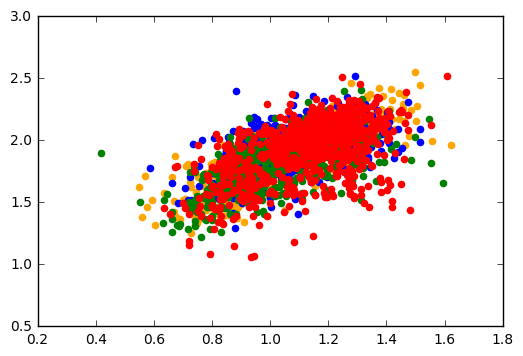

In [52]:
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Vienne').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Vienne').reshape(elections.shape[0]),1], label='Vienne', color="orange")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Charente').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Charente').reshape(elections.shape[0]),1], label='Charente', color="b")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Deux-Sèvres').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Deux-Sèvres').reshape(elections.shape[0]),1], label='Deux-Sèvres', color="g")
plt.scatter(encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Charente-Maritime').reshape(elections.shape[0]),0], encoded_imgs[np.array(elections[["Libellé.du.département"]]=='Charente-Maritime').reshape(elections.shape[0]),1], label='Charente-Maritime', color="r")

In [53]:
from sklearn.neural_network import BernoulliRBM
modelRBM = BernoulliRBM(n_components=2)
modelRBM.fit(x_train)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=10,
       random_state=None, verbose=0)

In [ ]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(modelRBM.components_):
    plt.subplot(1, 2, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()